<span style="font-size: 30px; font-weight: bold">Analysis of Penguin Mass, Bill Size, and Flipper Length Within Different Species</span>

<span style="font-size: 18px;">Author: Stephen Miller</span>

<span style="font-size: 18px;">February 16, 2024</span>

<span style="font-size: 24px; font-weight: bold">Purpose</span>

In this workbook, we will use Jupyter alongside Python to analyze the Penguin dataset from the Seaborn library. Our goal is to determine if penguin flipper length is directly proportional to penguin mass and to examine the effect of species on this relationship. Additionally, we will analyze penguin bill dimensions to investigate how they differ across penguin species.

In [384]:
#We start by importing dependencies

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

<span style="font-size: 24px; font-weight: bold">Data Acquisition</span>

In [385]:
# Load the Iris dataset into DataFrame
df = sns.load_dataset('penguins')

print(len(df))

# Inspect first rows of the DataFrame
print(df.head())

344
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


<span style="font-size: 24px; font-weight: bold">Initial Data Inspection</span>

From the intial review of the columns, we see a few issues. First, the column titles aren't proper, so we will rename them to look more presentable in tables. 

We also see on line 3, there is an entry with incomplete data. Keeping in incomplete information can throw off our analysis later on, so we will also remove all rows with incomplete data.

In [386]:
#rename columns to be more presentatable in tables and graphs
df.rename(columns={'species': 'Species'}, inplace=True)
df.rename(columns={'island': 'Island'}, inplace=True)
df.rename(columns={'bill_length_mm': 'Bill Length(mm)'}, inplace=True)
df.rename(columns={'bill_depth_mm': 'Bill Depth(mm)'}, inplace=True)
df.rename(columns={'flipper_length_mm': 'Flipper Length(mm)'}, inplace=True)
df.rename(columns={'body_mass_g': 'Body Mass(g)'}, inplace=True)
df.rename(columns={'sex': 'Sex'}, inplace=True)

df = df.dropna()  #Drop rows with incomplete data

print(df.head(10))
print(df.shape)
print(df.dtypes)

   Species     Island  Bill Length(mm)  Bill Depth(mm)  Flipper Length(mm)  \
0   Adelie  Torgersen             39.1            18.7               181.0   
1   Adelie  Torgersen             39.5            17.4               186.0   
2   Adelie  Torgersen             40.3            18.0               195.0   
4   Adelie  Torgersen             36.7            19.3               193.0   
5   Adelie  Torgersen             39.3            20.6               190.0   
6   Adelie  Torgersen             38.9            17.8               181.0   
7   Adelie  Torgersen             39.2            19.6               195.0   
12  Adelie  Torgersen             41.1            17.6               182.0   
13  Adelie  Torgersen             38.6            21.2               191.0   
14  Adelie  Torgersen             34.6            21.1               198.0   

    Body Mass(g)     Sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
4         3450.0  Female  
5     

In our initial data inspection, we see all numeric values are stored as floats. Past the initial review of data types, it is important to note the large number of variables. We have 4 numeric values and 3 objects. If we were to break down how each object relates to each numeric value, the workbook would lose its scope very quickly. Because of this, we are not going to take island or sex into account for this analysis. This will allow us to look into the relationship between other variables in more detail.

<span style="font-size: 24px; font-weight: bold">Initial Descriptive Statistics</span>

In [387]:
#use built in describe function to get statistics for the data set
print(df.describe())


       Bill Length(mm)  Bill Depth(mm)  Flipper Length(mm)  Body Mass(g)
count       333.000000      333.000000          333.000000    333.000000
mean         43.992793       17.164865          200.966967   4207.057057
std           5.468668        1.969235           14.015765    805.215802
min          32.100000       13.100000          172.000000   2700.000000
25%          39.500000       15.600000          190.000000   3550.000000
50%          44.500000       17.300000          197.000000   4050.000000
75%          48.600000       18.700000          213.000000   4775.000000
max          59.600000       21.500000          231.000000   6300.000000


The table above shows a basic statistic description of our data set. From an initial review of this data, it is notable that the minimum mass is less than half of the maximum mass, while the other variables don't have anywhere near that large of a discrepency. We will revisit these relationships as we look further into the data. 

<span style="font-size: 24px; font-weight: bold">Initial Data Distribution for Categorical Columns</span>

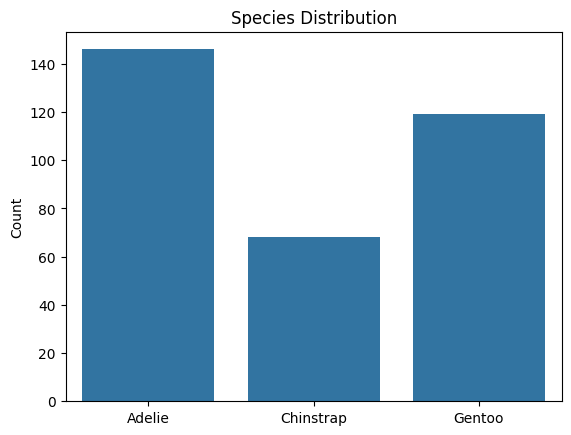

In [388]:
# Create a countplot for species distribution
sns.countplot(x='Species', data=df)
plt.title('Species Distribution')
plt.xlabel('')
plt.ylabel('Count')

# Show the plot
plt.show()


First, we want to get an idea of the weight each species has in the discussion. As we see from the bar chart above, there are double the number of Adelie penguins as there are Chinstrap. Ideally we would have more similar numbers, but it's most important that we have a good ammount of each. In other words, it is more valuable to have these distrubutions than to only have 20 of each penguin. If you refer to our previous workbook, which analyzed different flower species, there was 50 of each in that project. Here, we have more data for each species. 

<span style="font-size: 24px; font-weight: bold">Initial Data Distribution for Numerical Columns</span>

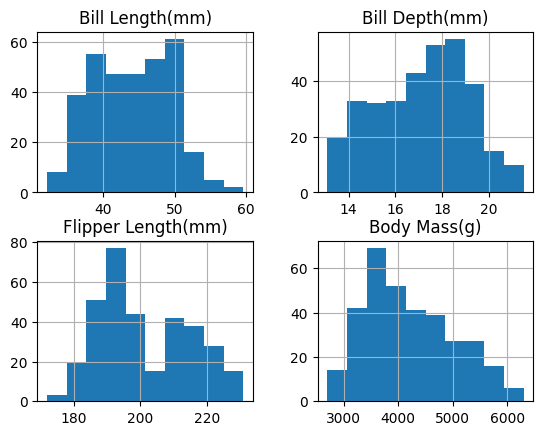

In [389]:
# Inspect histograms for all numerical columns
df.hist()

# Show all plots
plt.show()

Looking at these charts, it appears that bill length is symmetric, but slightly bimodal. Bill depth skews left, while body mass skews right. Finally, flipper length is non-symmetric and bimodal. 

However, we have to remember this is looking at all penguin species together, and one of our primary focuses in this workbook is to see how different species differ in these variables.

Let's start by looking at if flipper length goes up with body mass, and how it differs between species.

<span style="font-size: 24px; font-weight: bold">Initial Visualizations</span>

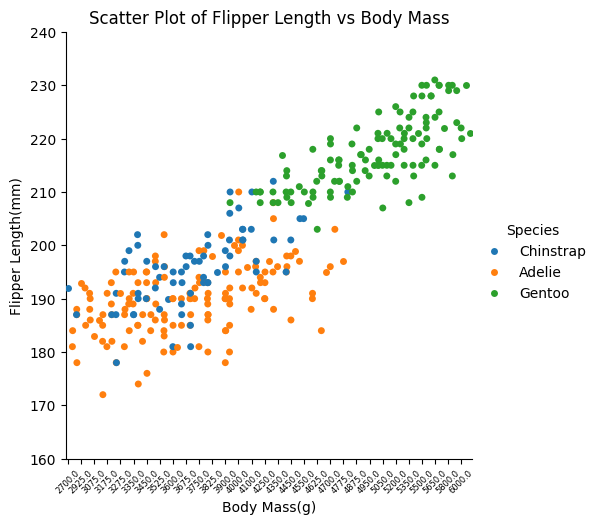

In [390]:
#make a scatterplot of Flipper Length vs Body Mass
sns.catplot(df, x='Body Mass(g)', y='Flipper Length(mm)', hue='Species')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(3))
plt.xticks(fontsize=6) #lower font size of x-axis
# Set the y-axis range from 100 to 230
plt.ylim(160, 240)

plt.title('Scatter Plot of Flipper Length vs Body Mass')
plt.show()

In the scatter plot above, we see flipper length vs body mass. The first point that sticks out is how Gentoo penguins are much larger than the other two species. Meanwhile, Chinstrap and Adelie are very similar in terms of body mass distribution, with chinstraps seeming to have slightly longer flippers in general. 

From a brief glance, it looks like the slope of each set of data could be fairly similar, which would suggest that while penguin mass increases, their flipper length increases in a similar proportion accross species. However, we don't want to eyeball it. Let's plot the graph again, while including regression lines to give us exact slopes.

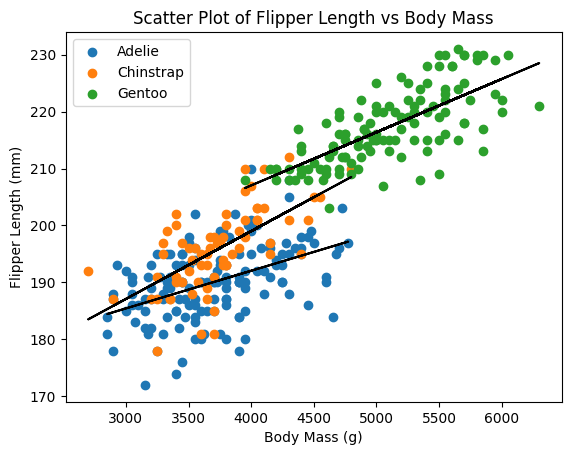

     Species     Slope
0     Adelie  0.006610
1  Chinstrap  0.011905
2     Gentoo  0.009341


In [391]:
slope_data = []

# Iterate over each species
for species in df['Species'].unique():
    # Filter data for the current species
    species_data = df[df['Species'] == species] # Extract x and y values
    x = species_data['Body Mass(g)']
    y = species_data['Flipper Length(mm)']

    # Perform linear regression using numpy.polyfit
    slope, intercept = np.polyfit(x, y, 1)
    
    # Append species and slope to list
    slope_data.append({'Species': species, 'Slope': slope})
    
    # Plot the scatter plot
    plt.scatter(x, y, label=species)

    # Plot the regression line
    plt.plot(x, slope*x + intercept, color='black')

# Set labels and title
plt.xlabel('Body Mass (g)')
plt.ylabel('Flipper Length (mm)')
plt.title('Scatter Plot of Flipper Length vs Body Mass')

# Add legend
plt.legend()

# Show plot
plt.show()

# Convert list to DataFrame
slope_df = pd.DataFrame(slope_data)

# Display the slope data
print(slope_df)

Here, we see that the slopes are not as similar as you may think from looking at the scatters data int he previous scatter plot. Here, we seethat the slope of the Chinstrap data is almost double that of the Adelie. This makes sense when we remember thatthey have similar ranges of body mass, while Chinstrap penguins have longer flippers in general.

Lets investigate this further using bar graphs focused on frequency of flipper length.

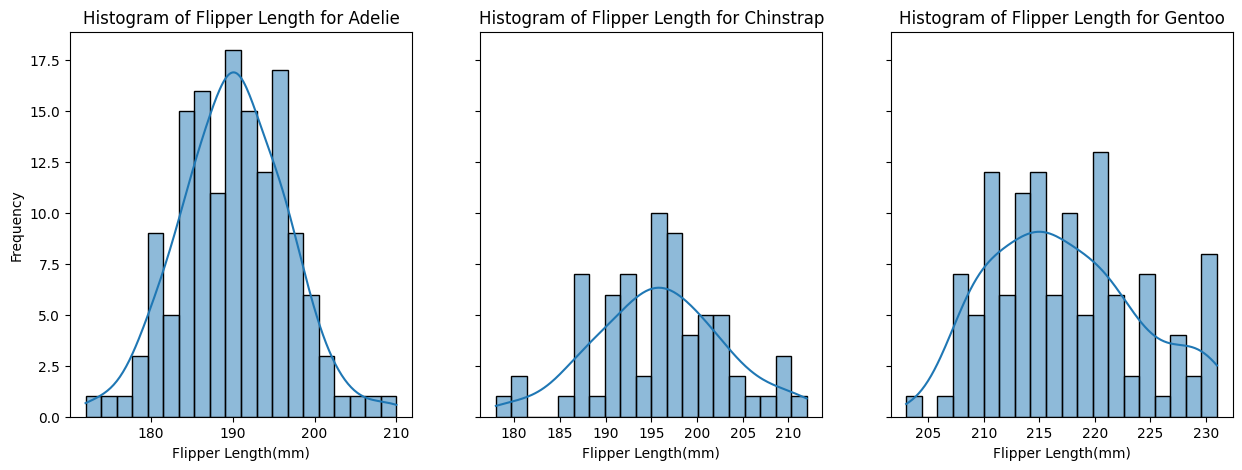

In [392]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for i, species in enumerate(df['Species'].unique()):
    sns.histplot(data=df[df['Species'] == species], x='Flipper Length(mm)', bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of Flipper Length for {species}')
    axes[i].set_xlabel('Flipper Length(mm)')

# Set common y-axis label
axes[0].set_ylabel('Frequency')

plt.show()

From these bar graphs, we see Adelie has a very strong symmetric distribution. While Chinstrap is not as strong, it also have a very symmetric distribution. Gentoo isn't as symmetric, as it skews right, but it is a fairly standard distribution. 

When we take into account the graphs from above, we can conclude that flipper length does go up with an increase in mass, as you would expect, though the exact proportion changes depending on the species.

Let's now shift our focus and look at bill dimensions.

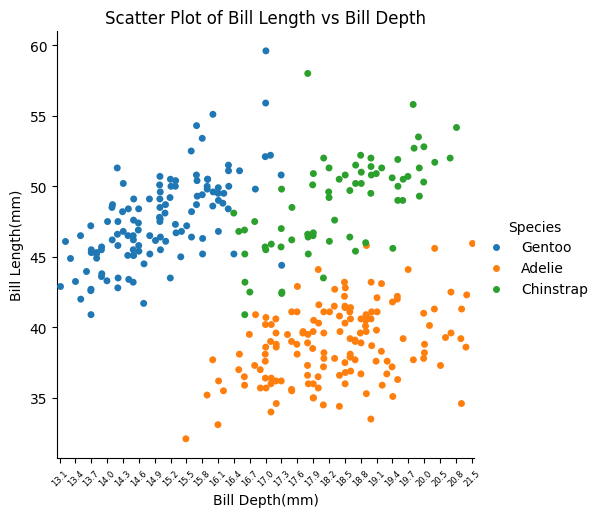

In [393]:
#make a scatterplot of Bill Length vs Bill Depth
sns.catplot(df, x='Bill Depth(mm)', y='Bill Length(mm)', hue='Species')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(3))
plt.xticks(fontsize=6) #lower font size of x-axis
plt.title('Scatter Plot of Bill Length vs Bill Depth')
plt.show()

Unlike the graph of flipper length, there isn't a clear trend shared by these three sets of data. In general, a both bill depth and bill length increase together, but the relationship from species to species varies greatly. Looking at Gentoo, they have similar bill lengths to Chinstrap penguins, but they are much less deep. So they are much thinner. Meanwhile, Adelie shares similar depths to Chinstrap, but they are much shorter. While the penguins do have clear differences in their bill dimensions, it is important to look at the axis values to see it isn't a huge difference in the average values of each. On average, an Adelie's bill length is less than 10mm below the average value of Gentoo and Chinstrap.

These variables show us the dimensions upward and outward for their bills, but let's make a variable to give us a rough idea of a bill's volume.

<span style="font-size: 24px; font-weight: bold">Initial Data Transformation and Feature Engineering</span>

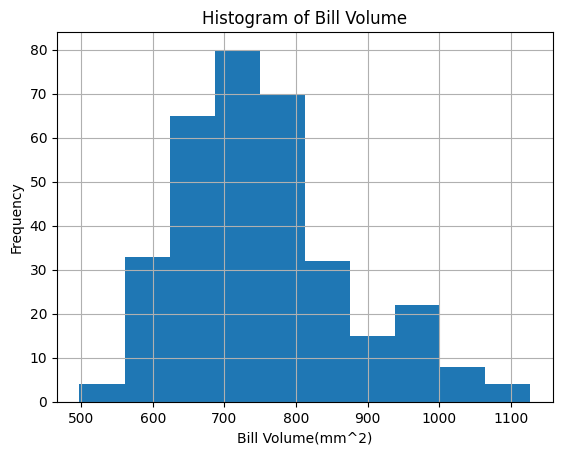

In [394]:
df['Bill Volume(mm^2)'] = df['Bill Length(mm)'] * df['Bill Depth(mm)']

df['Bill Volume(mm^2)'].hist()

plt.title('Histogram of Bill Volume')
plt.xlabel('Bill Volume(mm^2)')
plt.ylabel('Frequency')

plt.show()

Here we see a fairly standard right-skewed distribution of bill volume. Notably, the data seems more uniform than you would think, since the different species are very different on the above graph. This leans into our discussion above about the overall dimensions being closer than you would first assume from glancing at the graph. 

It is also important to note that bill length plays a more meaningful role in bill volume, since it is generally at least double the value of bill depth.

The right side of the distribution is certainly mostly Chinstrap penguins, as they have the largest dimensions on average. However, let's break it down further by looking at each species individually.

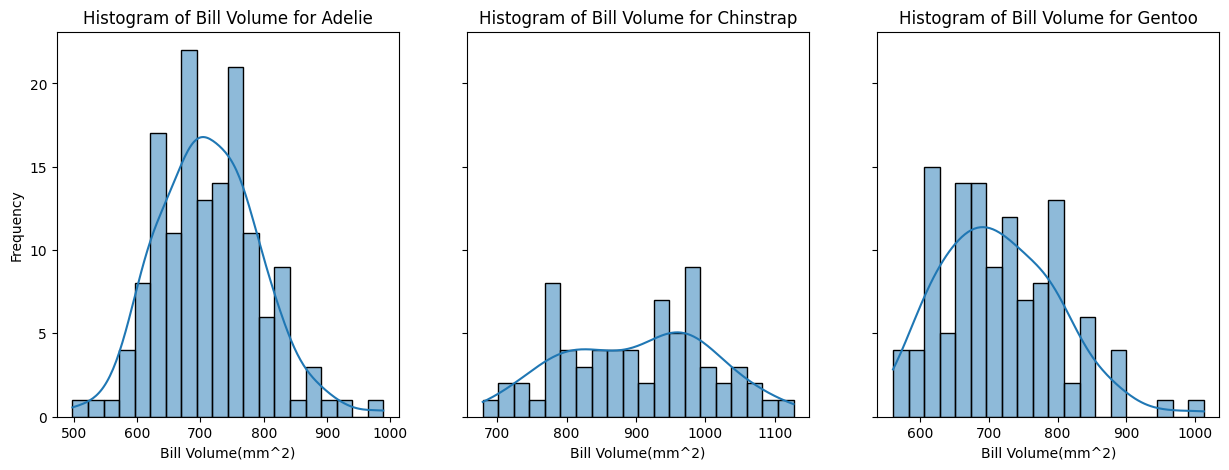

In [395]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for i, species in enumerate(df['Species'].unique()):
    sns.histplot(data=df[df['Species'] == species], x='Bill Volume(mm^2)', bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of Bill Volume for {species}')
    axes[i].set_xlabel('Bill Volume(mm^2)')

# Set common y-axis label
axes[0].set_ylabel('Frequency')

plt.show()

Here, we confirm that the large majority bill volume values over 900mm^2 are from Chinstrap penguins. It is interesting, however, to see that distribution of Chinstrap bill volumes is much less of a standard distribution than the other two penguins.

The issue is, with this analysis we haven't taken body mass into account. Do Chinstrap penguins have the largest bills, or is it possible that they actually have smaller bills relative to their bosy mass? Let's make a new graph for bill volume vs body mass, and an accompanying variable so we can look at each species individually.

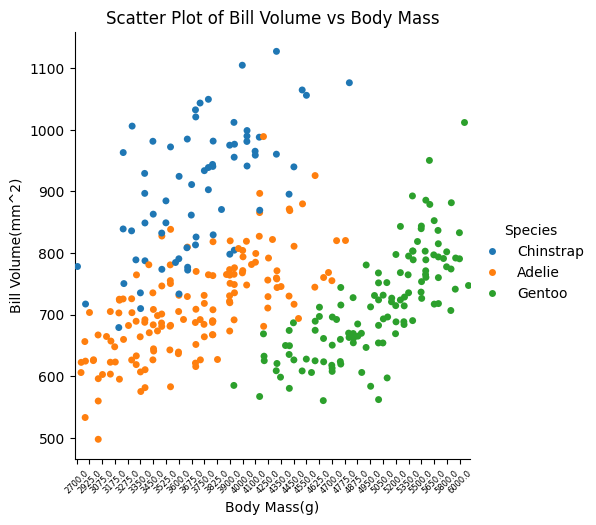

In [396]:
#make a scatterplot of Bill Volume vs Body Mass
sns.catplot(df, x='Body Mass(g)', y='Bill Volume(mm^2)', hue='Species')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(3))
plt.xticks(fontsize=6) #lower font size of x-axis
plt.title('Scatter Plot of Bill Volume vs Body Mass')
plt.show()

From an initial review, Chinstrap penguins are smaller than Gentoo penguins, yet they have larger bills on average. So it is a species factor, not just a factor of their size. However, let's look at individual bar charts for each species and summarize our findings.

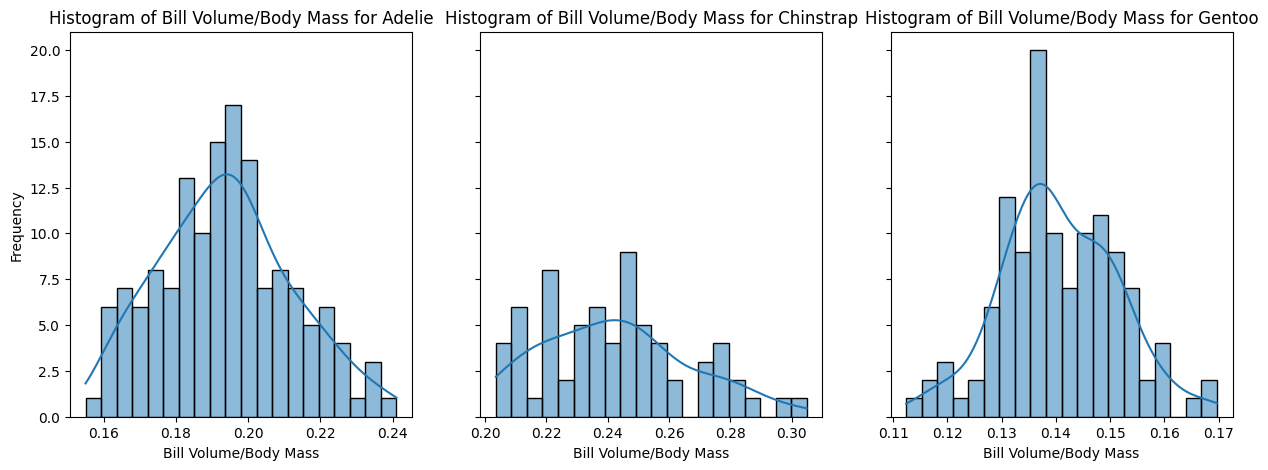

In [397]:
df['Bill Volume to Body Mass Ratio'] = df['Bill Volume(mm^2)'] / df['Body Mass(g)']

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for i, species in enumerate(df['Species'].unique()):
    sns.histplot(data=df[df['Species'] == species], x='Bill Volume to Body Mass Ratio', bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of Bill Volume/Body Mass for {species}')
    axes[i].set_xlabel('Bill Volume/Body Mass')

# Set common y-axis label
axes[0].set_ylabel('Frequency')

plt.show()

This coincides with our previous discussion of the differences in bill volume to penguin species, but it further illustrates the starkest differences between each species that we've seen. Looking at the X-axis of each graph, the three species hardly share any ratios of bill volume to body mass. Gentoo have the smallest bill size to body mass ratio, with values from 0.11 to 0.17. Adelie are next, but share very few values. They start at 0.16 and go to 0.24. Finally, Chinstrap go from 0.20 to 0.30, with most penguins having a higher ratio than any Adelie penguins.

<span style="font-size: 24px; font-weight: bold">Conclusions</span>

In conclusion, flipper length increases with size across all of our penguin species. However, Chinstrap had the strongest linear correlation between flipper length increasing with body mass, followed by Gentoo then Adelie. 

When analyzing the differences in bills between penguin species, we see Gentoo and Chinstrap have similar bill lengths, but Chinstrap's are thicker. Adelie share a similar thickness to Chinstrap, but they are shorter. When we take weight into account, it further separates the three species and shows three distinct bills. Chinstrap penguins are much lighter than Gentoo penguins on average, yet they have large bills. 

<span style="font-size: 24px; font-weight: bold">Room for Further Analysis</span>

The next topic I would like to delve into is what affect sex has on the body dimensions we've been analyzing.